Thành viên:
- 23C24004 - Lê Nhựt Nam
- 23C24005 - Phạm Thừa Tiểu Thành

Phân công công việc
- Thành -> xử lý dữ liệu
- Nam ->  Hồi quy mô hình --> nhận xét


In [ ]:
# Cài đặt gói googledrive nếu bạn chưa có
install.packages("googledrive")

# Tải gói googledrive
library(googledrive)

# Xác thực quyền truy cập Google Drive
drive_auth()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

The googledrive package is requesting access to your Google account.
Enter '1' to start a new auth process or select a pre-authorized account.
1: Send me to the browser for a new auth process.
2: phamthuatieuthanh@gmail.com


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=749c803ed295b59f799dc1ac9d44db02&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVR4M0xZNTFMYkJ0SmQ2LWE4Qm1nTnFfRm82clBfbFktVExJbnpUSUlQNTdxMUJ1anRKd1FRZXhzMjNFcTlRdWtqYk54dyIsInN0YXRlIjoiNzQ5YzgwM2VkMjk1YjU5Zjc5OWRjMWFjOWQ0NGRiMDIifQ==


# Installation and import

In [ ]:
install.packages("dplyr")
install.packages("tidyr")
install.packages("car")
install.packages("MASS")
install.packages("leaps")
install.packages("Metrics")
install.packages("lmtest")
install.packages("ggplot2")
install.packages("FactoMineR")
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘lazyev

In [ ]:
library(dplyr)
library(tidyr)
library(car)
library(MASS)
library(leaps)
library(Metrics)
library(lmtest)
library(ggplot2)
library(FactoMineR)
library(corrplot)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


corrplot 0.92 loaded



# Data Preprocessing

## Support Function

In [ ]:
remove_high_vif <- function(regr_variable, data, threshold = 5) {
    library(car)
    library(dplyr)

    stop <- FALSE
    while(stop == FALSE) {
        # Tính VIF cho các biến độc lập
        model <- lm(as.formula(paste(regr_variable, "~ .")), data = data)
        vif_values <- vif(model)
        # Tìm các biến có VIF cao hơn ngưỡng
        high_vif <- which(vif_values > threshold)

        if (length(high_vif) > 0) {
            # Loại bỏ các biến có VIF cao
            remove_index <- which.max(high_vif)
            rm_names <- names(data[, !names(data) %in% regr_variable])
            rm_name <- rm_names[remove_index]
            data <- data[, !names(data) %in% rm_name]
        } else {
            stop <- TRUE
        }
    }
    return(data)
}

In [ ]:
# Statistic functions

# Function to calculate missing ratio
missing_ratio <- function(s) {
  round(mean(is.na(s)) * 100, 1)
}

# Function to calculate median
median_custom <- function(df) {
  round(quantile(df, 0.5, na.rm = TRUE), 1)
}

# Function to calculate lower quartile
lower_quartile <- function(df) {
  round(quantile(df, 0.25, na.rm = TRUE), 1)
}

# Function to calculate upper quartile
upper_quartile <- function(df) {
  round(quantile(df, 0.75, na.rm = TRUE), 1)
}


## Load dữ liệu

In [ ]:
data_path = "/content/Boston.csv"
# Đọc dữ liệu từ tập tin
raw_data = read.table(data_path, header=TRUE, sep=",", stringsAsFactors = FALSE)

# remove cột đầu vì đó là cột số thứ tự
raw_data = raw_data[, -1]
str(raw_data)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : int  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [ ]:
# shape of data
dim(raw_data)

[1] 506  14

In [ ]:
# Kiểm tra dữ liệu trùng lặp
duplicates = raw_data[duplicated(raw_data), ]
duplicate_counts = table(raw_data[duplicated(raw_data), ])
duplicates # Không có dữ liệu trùng lặp

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>


In [ ]:
# Select numerical columns
num_col_info_df <- as.data.frame(raw_data)  %>%
  select_if(is.numeric)

# Aggregating statistics
num_col_info_df <- num_col_info_df %>%
  reframe(
    field_name = names(raw_data),
    missing_ratio = sapply(., missing_ratio),
    min = sapply(., min, na.rm = TRUE),
    lower_quartile = sapply(., lower_quartile),
    median = sapply(., median_custom),
    upper_quartile = sapply(., upper_quartile),
    max = sapply(., max, na.rm = TRUE)
  )

  print(num_col_info_df)

   field_name missing_ratio       min lower_quartile median upper_quartile
1        crim             0   0.00632            0.1    0.3            3.7
2          zn             0   0.00000            0.0    0.0           12.5
3       indus             0   0.46000            5.2    9.7           18.1
4        chas             0   0.00000            0.0    0.0            0.0
5         nox             0   0.38500            0.4    0.5            0.6
6          rm             0   3.56100            5.9    6.2            6.6
7         age             0   2.90000           45.0   77.5           94.1
8         dis             0   1.12960            2.1    3.2            5.2
9         rad             0   1.00000            4.0    5.0           24.0
10        tax             0 187.00000          279.0  330.0          666.0
11    ptratio             0  12.60000           17.4   19.0           20.2
12      black             0   0.32000          375.4  391.4          396.2
13      lstat            

### Thông tin về các trường trong bộ dữ liệu
- crim (numerical, continuous): tỷ lệ tội phạm bình quân đầu người theo thị trấn
- zn (numerical, continuous): tỷ lệ đất ở được quy hoạch cho các lô có diện tích trên 25.000 m2.
- indus (numerical, continuous): tỷ lệ diện tích kinh doanh phi bán lẻ trên mỗi thị trấn.
- chas (categorical, nominal): Sông Charles (= 1 nếu đường giáp sông; 0 nếu không) (biến giả - dummy variable).
- nox (numerical, continuous): nồng độ oxit nitơ (phần trên 10 triệu).
- rm (numerical, continuous): số phòng trung bình cho mỗi nhà ở.
- age (numerical, continuous): tỷ lệ các căn hộ do chủ sở hữu sử dụng được xây dựng trước năm 1940.
- dis (numerical, continuous): khoảng cách trung bình có trọng số đến năm trung tâm việc làm ở Boston.
- rad (categorical, ordinal): chỉ số khả năng tiếp cận các đường cao tốc hướng tâm. chỉ số lớn hơn biểu thị khả năng tiếp cận tốt hơn.
- tax (numerical, continuous): mức thuế tài sản có giá trị đầy đủ trên 10.000 USD.
- ptratio (numerical, continuous): tỷ lệ học sinh-giáo viên theo thị trấn.
- black (numerical, continuous): $1000 (Bk - 0.63)^2$ trong đó $Bk$ là tỷ lệ người da đen theo thị trấn.
- lstat (numerical, continuous): địa vị thấp hơn của dân số (phần trăm)
- medv (numerical, continuous): giá trị trung bình của những ngôi nhà do chủ sở hữu sử dụng tính bằng $1000

### Nhận xét tổng quan
- Bộ dữ liệu gồm có 506 quan trắc, mỗi quan trắc tương ứng có 14 đặc trưng (features)
- Dữ liệu không có sự trùng lặp giữa các quan trắc
- Không có hiện tượng bị khuyến dữ liệu (missing value)
- Biến phụ thuộc: `medv`
- Các biến `chas` và `rad` thuộc kiểu `categorical` --> cần xử lý trước khi sử dụng. Trong assigment này sử dụng phương pháp PCA vì vậy chúng ta sẽ loại các biến này ra khỏi tập dữ liệu trong quá trình xử lý.

## Xử lý dữ liệu

In [ ]:
# Chia dữ liệu
set.seed(42)
raw_data = raw_data[, !(names(raw_data) %in% c("rad","chas"))]
n = nrow(raw_data)
train_indices <- sample(seq_len(n), size = 0.7 * n)
train = raw_data[train_indices,]
test = raw_data[-train_indices,]

dim(train)
dim(test)

[1] 354  12

[1] 152  12

### Trực quan hoá dữ liệu

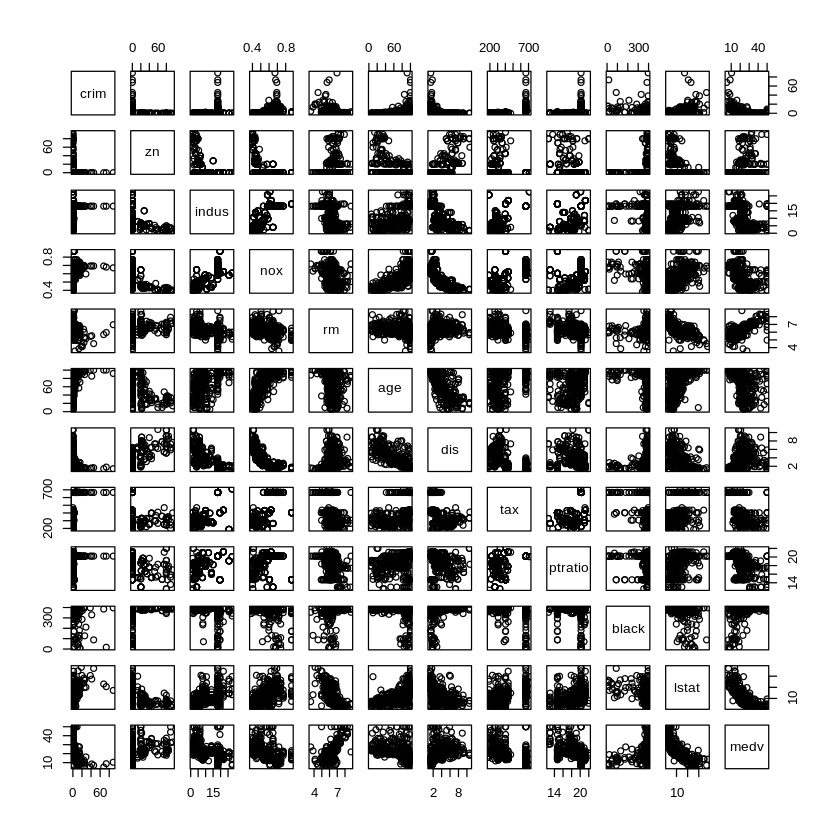

In [ ]:
plot(train)

### Ma trận tương quan giữa các biến

In [ ]:
round(cor(train),2)

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,black,lstat,medv
crim,1.00,-0.18,0.37,0.41,-0.21,0.33,-0.35,0.56,0.27,-0.32,0.45,-0.37
zn,-0.18,1.00,-0.51,-0.51,0.25,-0.56,0.68,-0.28,-0.34,0.15,-0.37,0.28
indus,0.37,-0.51,1.00,0.75,-0.38,0.62,-0.69,0.70,0.33,-0.33,0.57,-0.44
nox,0.41,-0.51,0.75,1.00,-0.28,0.72,-0.76,0.67,0.15,-0.40,0.56,-0.39
rm,-0.21,0.25,-0.38,-0.28,1.00,-0.23,0.18,-0.29,-0.36,0.14,-0.61,0.68
age,0.33,-0.56,0.62,0.72,-0.23,1.00,-0.76,0.49,0.21,-0.27,0.57,-0.34
dis,-0.35,0.68,-0.69,-0.76,0.18,-0.76,1.00,-0.52,-0.18,0.27,-0.47,0.20
tax,0.56,-0.28,0.70,0.67,-0.29,0.49,-0.52,1.00,0.44,-0.38,0.51,-0.42
ptratio,0.27,-0.34,0.33,0.15,-0.36,0.21,-0.18,0.44,1.00,-0.11,0.36,-0.49
black,-0.32,0.15,-0.33,-0.40,0.14,-0.27,0.27,-0.38,-0.11,1.00,-0.35,0.31


Dựa bên ma trận tương quan, ta có thể thấy được sự ảnh hưởng của các biến đối với biến medv. Ví dụ:
- Các biến lstat, ptratio có tương quan nghịch với biến medv
- Các biến black có tương quan thuận với biến medv

Bên cạnh đó, ma trận tương quan cũng cho ta các insight về việc giữa các biến có mối liên hệ gì với nhau hay không. Ví dụ:
- Giữa tax và indus có mối liên hệ cao (0.70), điều này nói lên rằng mức thuế tài sản tỷ lệ thuận với diện tích kinh doanh phi bán lẻ trong thị trấn.

### Khảo sát ngoại lai

In [ ]:
# Khảo sát ngoại lai theo từng biến độc lập của tập train
outliers_index = list()
extreme_outliers_index = list()

for (i in 1:ncol(train)) {
  # Tính toán Q1, Q3 và IQR
  Q1 = quantile(train[, i], 0.25, na.rm = TRUE)
  Q3 = quantile(train[, i], 0.75, na.rm = TRUE)
  IQR = Q3 - Q1

  # Xác định ngoại lai
  outliers_index_i = train[, i] < (Q1 - 1.5 * IQR) | train[, i] > (Q3 + 1.5 * IQR)
  # outliers_i = train[train[, i] < (Q1 - 1.5 * IQR) | train[, i] > (Q3 + 1.5 * IQR), i]

  # Lưu trữ ngoại lai
  field_name = names(train)[i]
  outliers_index[[field_name]] = which(outliers_index_i)

  # Xác định cực ngoại lai
  extreme_outliers_index_i = train[, i] < (Q1 - 3 * IQR) | train[, i] > (Q3 + 3 * IQR)
  extreme_outliers_index[[field_name]] = which(extreme_outliers_index_i)
}
# In kết quả theo từng biến ra màn hình
for (i in 1:ncol(train)) {
  print(paste("Biến:", names(train)[i]))
  print(paste("Số ngoại lai:", length(outliers_index[[names(train)[i]]])))
  print(paste("Số cực ngoại lai:", length(extreme_outliers_index[[names(train)[i]]])))
}

# Tìm tổng số quan trắc ngoại lai và cực ngoại lai thực sự
outliers = c()
extreme_outliners = c()
for (i in 1:ncol(train)){
    outliers = c(outliers, outliers_index[[names(train)[i]]])
    extreme_outliners = c(extreme_outliners, extreme_outliers_index[[names(train)[i]]])
}

outliers = unique(outliers)
extreme_outliners = unique(extreme_outliners)
print(paste("Tổng số ngoại lai:", length(outliers)))
print(paste("Tổng số cực ngoại lai:", length(extreme_outliners)))

[1] "Biến: crim"
[1] "Số ngoại lai: 48"
[1] "Số cực ngoại lai: 24"
[1] "Biến: zn"
[1] "Số ngoại lai: 85"
[1] "Số cực ngoại lai: 85"
[1] "Biến: indus"
[1] "Số ngoại lai: 0"
[1] "Số cực ngoại lai: 0"
[1] "Biến: nox"
[1] "Số ngoại lai: 0"
[1] "Số cực ngoại lai: 0"
[1] "Biến: rm"
[1] "Số ngoại lai: 23"
[1] "Số cực ngoại lai: 4"
[1] "Biến: age"
[1] "Số ngoại lai: 0"
[1] "Số cực ngoại lai: 0"
[1] "Biến: dis"
[1] "Số ngoại lai: 5"
[1] "Số cực ngoại lai: 0"
[1] "Biến: tax"
[1] "Số ngoại lai: 0"
[1] "Số cực ngoại lai: 0"
[1] "Biến: ptratio"
[1] "Số ngoại lai: 11"
[1] "Số cực ngoại lai: 0"
[1] "Biến: black"
[1] "Số ngoại lai: 51"
[1] "Số cực ngoại lai: 36"
[1] "Biến: lstat"
[1] "Số ngoại lai: 4"
[1] "Số cực ngoại lai: 0"
[1] "Biến: medv"
[1] "Số ngoại lai: 30"
[1] "Số cực ngoại lai: 12"
[1] "Tổng số ngoại lai: 184"
[1] "Tổng số cực ngoại lai: 148"


### Nhận xét
- Số lượng ngoại lai chiếm gần 42,7 %
- Số lượng cực ngoại lai chiếm gần 26,8 %

--> Dữ liệu có quan trắc ngoại lai khá nhiều. Trong TH đơn giản, tiến hành xóa đi những phần tử cực ngoại lai

In [ ]:
train = train[-extreme_outliners, ]

## Xây dựng mô hình

In [ ]:
# Remove các biến có giá trị phương sai bằng 0
constant_vars = sapply(train, function(x) var(x) == 0)
df = train[, !constant_vars]
summary(df)

      crim              indus             nox               rm       
 Min.   : 0.02729   Min.   : 2.180   Min.   :0.4130   Min.   :4.906  
 1st Qu.: 0.11205   1st Qu.: 7.147   1st Qu.:0.4930   1st Qu.:5.852  
 Median : 0.26600   Median :10.590   Median :0.5440   Median :6.122  
 Mean   : 1.88013   Mean   :12.425   Mean   :0.5675   Mean   :6.171  
 3rd Qu.: 2.29602   3rd Qu.:18.100   3rd Qu.:0.6090   3rd Qu.:6.410  
 Max.   :13.35980   Max.   :27.740   Max.   :0.8710   Max.   :8.337  
      age              dis             tax         ptratio          black      
 Min.   :  2.90   Min.   :1.174   Min.   :188   Min.   :14.70   Min.   :316.0  
 1st Qu.: 56.55   1st Qu.:2.222   1st Qu.:277   1st Qu.:17.80   1st Qu.:383.3  
 Median : 82.05   Median :2.876   Median :307   Median :19.20   Median :393.4  
 Mean   : 72.96   Mean   :3.217   Mean   :400   Mean   :18.93   Mean   :385.2  
 3rd Qu.: 94.10   3rd Qu.:4.001   3rd Qu.:437   3rd Qu.:20.20   3rd Qu.:396.9  
 Max.   :100.00   Max.   :6.45

### Nhận xét
- Như vậy sau khi loại bỏ thành phần cực ngoại lai, chúng ta thấy rằng biến `zn` có giá trị `var` không đổi --> Chứng tỏ rằng biến này không tham gia vào quá trình ảnh hưởng của mô hình
- Dữ liệu chúng ta bây giờ chỉ còn 10 biến độc lập

#### Xây dựng mô hình với dữ liệu gốc

In [ ]:
model_linear = lm(medv~., data=df)
summary(model_linear)
modBIC <- MASS::stepAIC(model_linear, k = log(nrow(train)), trace = 0)
summary(modBIC)

# Kiểm tra hiện tượng đa cộng tuyến
car::vif(modBIC)


Call:
lm(formula = medv ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5051 -2.1480 -0.3279  1.6523 11.5932 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.496545   7.756912   2.642 0.008902 ** 
crim        -0.016403   0.127820  -0.128 0.898020    
indus       -0.104329   0.057850  -1.803 0.072863 .  
nox         -4.094264   4.214105  -0.972 0.332472    
rm           6.435040   0.600074  10.724  < 2e-16 ***
age         -0.064080   0.014915  -4.296 2.74e-05 ***
dis         -1.208245   0.323451  -3.735 0.000246 ***
tax         -0.004454   0.002857  -1.559 0.120646    
ptratio     -0.813172   0.164959  -4.930 1.76e-06 ***
black       -0.019415   0.014734  -1.318 0.189131    
lstat       -0.139636   0.064513  -2.164 0.031644 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.41 on 195 degrees of freedom
Multiple R-squared:  0.7352,	Adjusted R-squared:  0.7216 
F-statistic: 54.14 o


Call:
lm(formula = medv ~ rm + age + dis + tax + ptratio + lstat, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9307 -2.1102 -0.4488  1.6338 12.7315 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.062701   4.816937   1.881 0.061374 .  
rm           6.577221   0.578072  11.378  < 2e-16 ***
age         -0.067902   0.014551  -4.666 5.62e-06 ***
dis         -0.996633   0.302590  -3.294 0.001170 ** 
tax         -0.007017   0.001867  -3.759 0.000224 ***
ptratio     -0.796955   0.154903  -5.145 6.39e-07 ***
lstat       -0.159638   0.063079  -2.531 0.012155 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.43 on 199 degrees of freedom
Multiple R-squared:  0.7265,	Adjusted R-squared:  0.7182 
F-statistic: 88.09 on 6 and 199 DF,  p-value: < 2.2e-16


rm      age      dis      tax  ptratio    lstat 
1.919245 2.336972 2.615389 1.674742 1.227699 2.609080

### Nhận xét
- Sau khi chọn mô hình tốt nhất, ta thu được các biến ảnh hưởng đến mô hình (với mức ý nghĩa 95 %) : `rm`, `age`, `dis`, `tax`, `ptratio`, `lstat`.
- Mức độ đa cộng tuyến của các biến này khá thấp (< 3).
- Các biến thích được 72.16 % ý nghĩa của mô hình.
- Nhìn chung số lượng phòng sẽ ảnh hưởng lớn đến giá nhà ở. Nếu tăng lên 1 phòng thì giá nhà sẽ tăng lên 6.5 đơn vị.
- Vị trí so với trung tâm thành phố cũng tác động tới giá nhà, nhà càng xa trung tâm thì càng rẻ.
- Các thành phần khác có tác động không đáng kể đến giá nhà.

#### Trực quan hoá


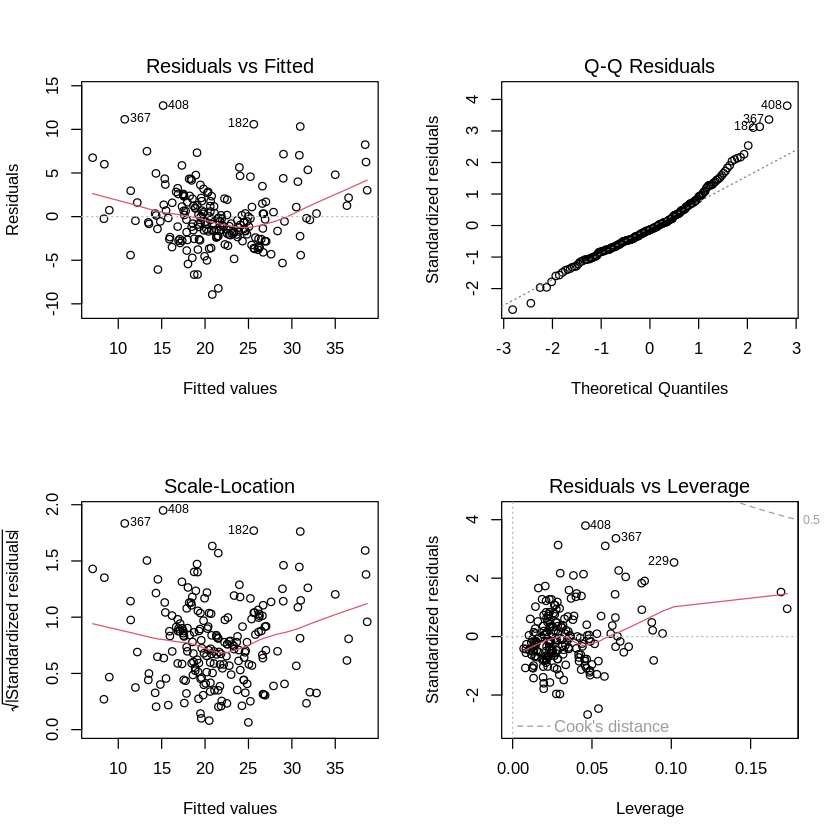

In [ ]:
# Trực quan hóa
par(mfrow = c(2, 2))
plot(modBIC)

#### Nhận xét
- Biểu đồ Residuals vs Fitted Plot: Như kết quả từ biểu đồ, ta thấy dáng của đường màu đỏ chưa gần như một đường thẳng và có xu hướng lệch về phía bên dưới của biểu đồ. Điều này thể hiện có tồn tại mối quan hệ phi tuyến trong dữ liệu.
- Biểu đồ Q-Q: Các giá trị thặng dư (residual) nên có phân phối chuẩn. Để kiểm tra điều này, chúng ta cần quan sát biểu đồ QQ Residuals plot, nếu các điểm được xếp thành một đường thẳng (hoặc gần như thẳng) thì chứng tỏ các giá trị thặng dư (residual) có phân phối chuẩn. Như hình vẽ kết quả ở trên, ta thấy rõ điều đó, residual chưa có phân phối chuẩn. --> Kiểm định
-  Biểu đồ Scale location: Đường màu đỏ gần như không nằm ngang trên biểu đồ. Nếu đúng như vậy thì giả định về tính đồng nhất chưa được thỏa mãn đối với mô hình hồi quy đã cho. Nghĩa là, độ phân tán của giá trị thặng dư gần chưa bằng nhau ở tất cả các giá trị phù hợp. -> Kiểm định.

In [ ]:
# Kiểm định shapiro
# - H0: Biến thặng dư của mô hình phân phối chuẩn trong một số quần thể.
# - H1: Biến thặng dư của mô hình không phân phối chuẩn trong một số quần thể.
shapiro.test(residuals(modBIC))


	Shapiro-Wilk normality test

data:  residuals(modBIC)
W = 0.95876, p-value = 1.088e-05


- Kết quả cho thấy p-value bé hơn mức ý nghĩa alpha 0.05 nên ta chưa có thể bác bỏ giả thhuyết H0, biến thặng dư của chúng ta chuẩn trong một số quần thể.

In [ ]:
# Kiểm định Breusch-Pagan
# - H0: phương sai không đổi
# - H1: phương sai thay đổi

bptest(modBIC)


	studentized Breusch-Pagan test

data:  modBIC
BP = 15.226, df = 6, p-value = 0.01857


- Như vậy, ta thấy p-value bé nhỏ hơn 0.05, ta không đủ điều kiện bác bỏ H0. Vậy mô hình có phương sai không thay đổi

[1] 4.994428

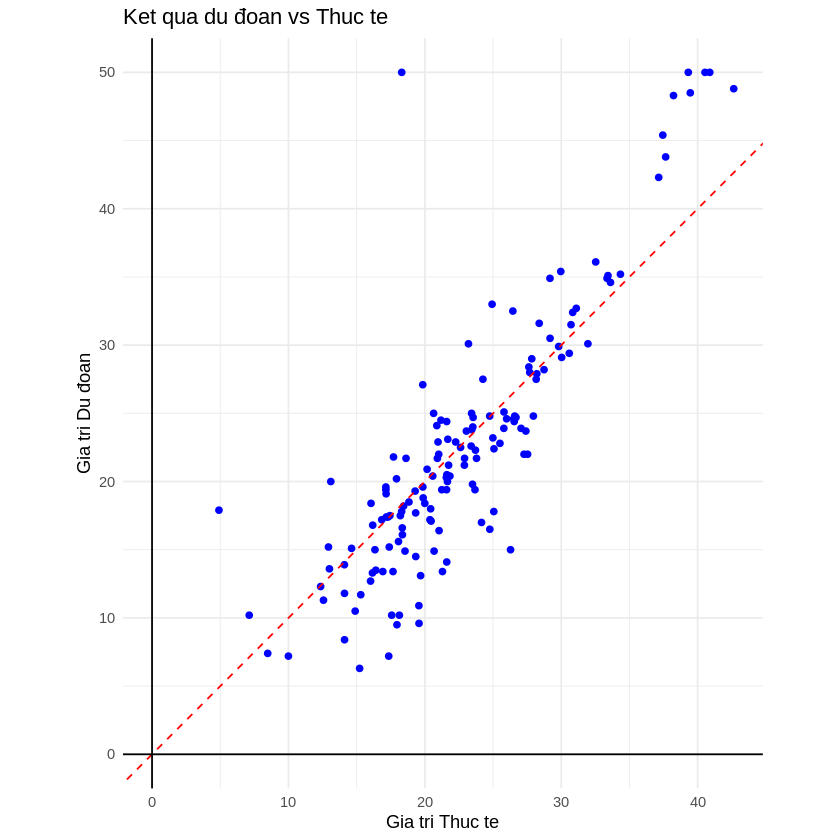

In [ ]:
# Kiểm định tập test

# predict
results <- predict(modBIC, test)
vis_df <- data.frame(
    du_doan <- results,
    label <- test$medv
)

library(ggplot2)
ggplot(vis_df , aes(x = du_doan, y = label)) +
  geom_point(color = 'blue') + geom_abline(intercept = 0, slope = 1, color = 'red', linetype = "dashed") +
  geom_hline(yintercept = 0, color = "black") +  # Trục Ox
  geom_vline(xintercept = 0, color = "black") +  # Trục Oy
  labs(
    title = "Ket qua du đoan vs Thuc te",
    x = "Gia tri Thuc te",
    y = "Gia tri Du đoan"
  ) +
  theme_minimal() + coord_fixed(ratio = 1)
rmse(results, test$medv)

### Xây dựng mô hình dùng PCA


Loadings:
        Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
crim     0.332  0.290  0.253  0.312  0.324  0.466  0.145                0.548 
indus    0.379                             -0.762  0.340 -0.177  0.115  0.315 
nox      0.398 -0.143  0.131         0.256        -0.513 -0.434 -0.506 -0.165 
rm      -0.206         0.744        -0.194         0.397        -0.429 -0.103 
age      0.326 -0.143  0.189 -0.558 -0.260  0.297  0.104 -0.407  0.439        
dis     -0.375  0.185 -0.163  0.335  0.102         0.266 -0.753        -0.161 
tax      0.374  0.254  0.225  0.316  0.105                0.181  0.344 -0.690 
ptratio  0.126  0.717               -0.597 -0.101 -0.239        -0.139  0.102 
black   -0.184  0.501        -0.570  0.587 -0.197                             
lstat    0.329        -0.491 -0.197         0.215  0.547        -0.454 -0.222 

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
SS loadings       1.0    1.0    1.0    1.

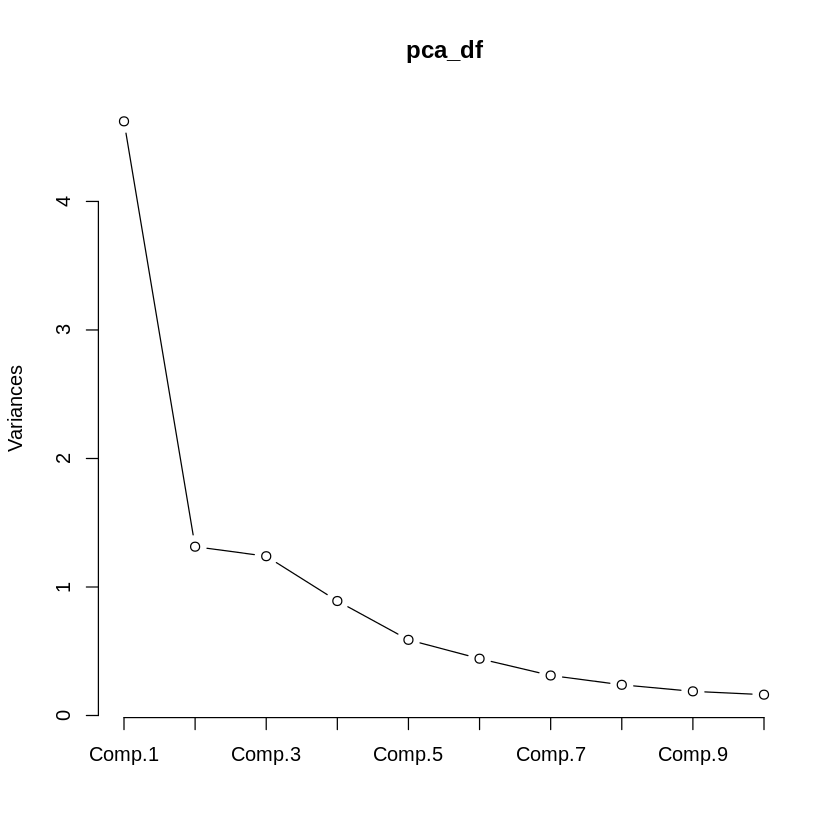

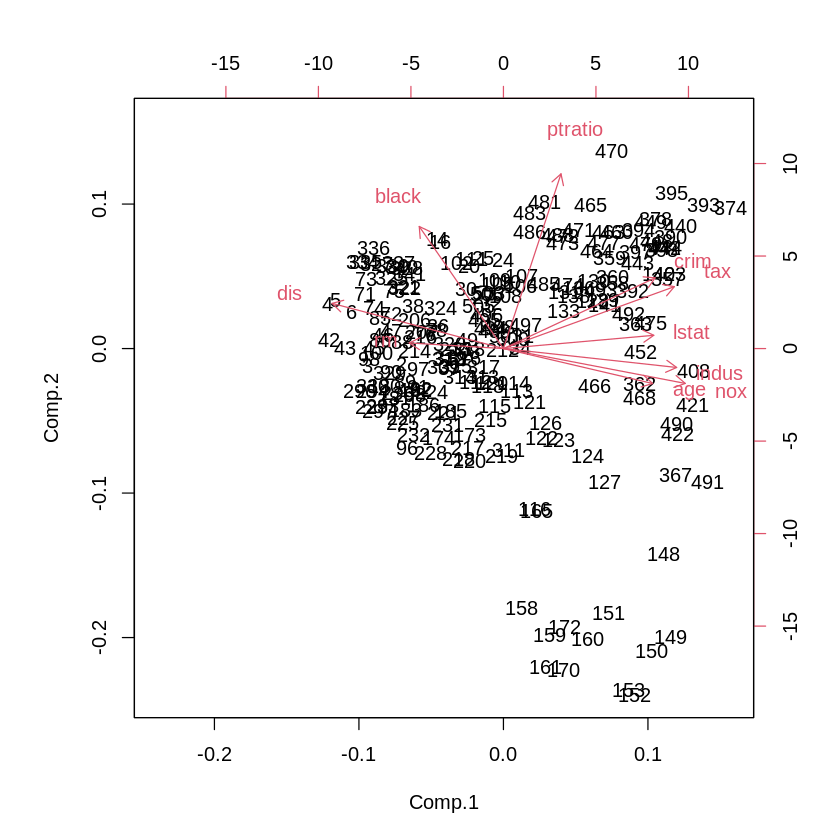

In [ ]:
# PCA
pca_df <- princomp(x = df[,-11], fix_sign = TRUE, cor = TRUE)
plot(pca_df, type = "l")
pca_df$loadings
biplot(pca_df, cex = 1)

#### Nhận xét
- Theo hình vẽ ta có l = 3 cho kết quả tốt nhất

##### Thí nghiệm 1: Lấy tất cả các thành phần chính

In [ ]:
pca_df = princomp(x = df[, -11], fix_sign = TRUE, cor = TRUE)
new_pca_df = data.frame("medv" = df$medv, pca_df$scores)
pca_model1 = lm(medv ~., data=new_pca_df)
summary(pca_model1)
modBIC <- MASS::stepAIC(pca_model1, k = log(nrow(train)), trace = 0)
summary(modBIC)
car::vif(modBIC)


Call:
lm(formula = medv ~ ., data = new_pca_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5051 -2.1480 -0.3279  1.6523 11.5932 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 21.53495    0.23756  90.652  < 2e-16 ***
Comp.1      -1.81777    0.11048 -16.453  < 2e-16 ***
Comp.2      -1.28013    0.20726  -6.176 3.74e-09 ***
Comp.3       3.00726    0.21337  14.094  < 2e-16 ***
Comp.4       0.15857    0.25166   0.630 0.529366    
Comp.5      -0.06892    0.30955  -0.223 0.824033    
Comp.6      -0.29648    0.35722  -0.830 0.407571    
Comp.7       0.68799    0.42565   1.616 0.107636    
Comp.8       2.00393    0.48589   4.124 5.50e-05 ***
Comp.9      -1.96527    0.54768  -3.588 0.000421 ***
Comp.10      0.27949    0.58968   0.474 0.636056    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.41 on 195 degrees of freedom
Multiple R-squared:  0.7352,	Adjusted R-squared:  0.7216 
F-statistic: 54.14 on 10


Call:
lm(formula = medv ~ Comp.1 + Comp.2 + Comp.3 + Comp.8 + Comp.9, 
    data = new_pca_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0802 -2.1208 -0.4449  1.8171 11.6117 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  21.5350     0.2369  90.885  < 2e-16 ***
Comp.1       -1.8178     0.1102 -16.496  < 2e-16 ***
Comp.2       -1.2801     0.2067  -6.192 3.31e-09 ***
Comp.3        3.0073     0.2128  14.131  < 2e-16 ***
Comp.8        2.0039     0.4846   4.135 5.22e-05 ***
Comp.9       -1.9653     0.5463  -3.598 0.000405 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.401 on 200 degrees of freedom
Multiple R-squared:  0.7298,	Adjusted R-squared:  0.723 
F-statistic:   108 on 5 and 200 DF,  p-value: < 2.2e-16


Comp.1 Comp.2 Comp.3 Comp.8 Comp.9 
     1      1      1      1      1

#### Nhận xét
- Trường hợp này cho kết quả giống với thí nghiệm với dữ liệu gốc.

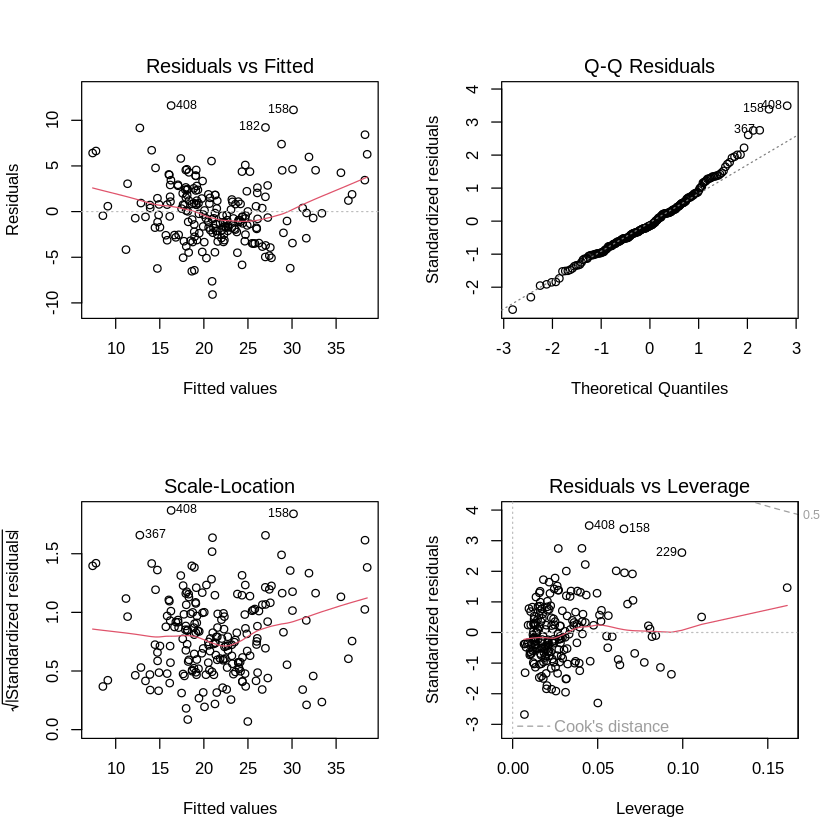

In [ ]:
# Trực quan hóa
par(mfrow = c(2, 2))
plot(modBIC)

##### Nhận xét
- Biểu đồ Residuals vs Fitted Plot: Như kết quả từ biểu đồ, ta thấy dáng của đường màu đỏ chưa gần như một đường thẳng và có xu hướng lệch về phía bên dưới của biểu đồ. Điều này thể hiện có tồn tại mối quan hệ phi tuyến trong dữ liệu.
- Biểu đồ Q-Q: Các giá trị thặng dư (residual) nên có phân phối chuẩn. Để kiểm tra điều này, chúng ta cần quan sát biểu đồ QQ Residuals plot, nếu các điểm được xếp thành một đường thẳng (hoặc gần như thẳng) thì chứng tỏ các giá trị thặng dư (residual) có phân phối chuẩn. Như hình vẽ kết quả ở trên, ta thấy rõ điều đó, residual chưa có phân phối chuẩn. --> Kiểm định
-  Biểu đồ Scale location: Đường màu đỏ gần như không nằm ngang trên biểu đồ. Nếu đúng như vậy thì giả định về tính đồng nhất chưa được thỏa mãn đối với mô hình hồi quy đã cho. Nghĩa là, độ phân tán của giá trị thặng dư gần chưa bằng nhau ở tất cả các giá trị phù hợp. -> Kiểm đinh.

In [ ]:
# Kiểm định shapiro
# - H0: Biến thặng dư của mô hình phân phối chuẩn trong một số quần thể.
# - H1: Biến thặng dư của mô hình không phân phối chuẩn trong một số quần thể.
shapiro.test(residuals(modBIC))


	Shapiro-Wilk normality test

data:  residuals(modBIC)
W = 0.97845, p-value = 0.002981


In [ ]:
# Kiểm định Breusch-Pagan
# - H0: phương sai không đổi
# - H1: phương sai thay đổi
bptest(modBIC)


	studentized Breusch-Pagan test

data:  modBIC
BP = 21.342, df = 5, p-value = 0.0006981


##### Nhận xét
- Qua kiểm định shapiro và Breusch cho ta tính hợp lệ của giả định (phân phối chuẩn và có phương sai không đổi)

[1] 7.753231

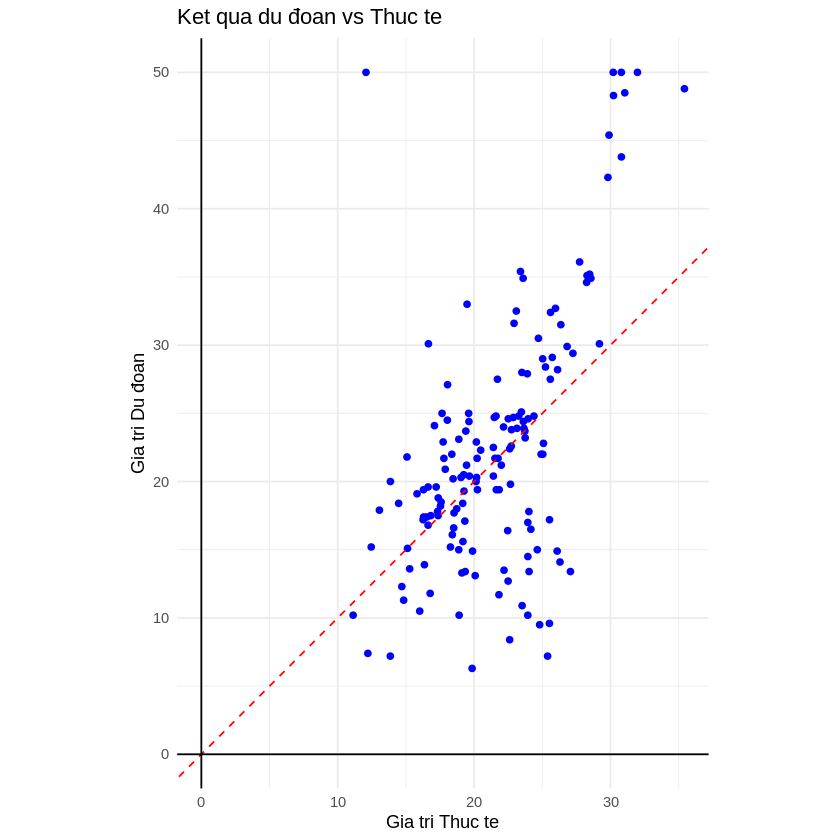

In [ ]:
# Dư đoán
alpha = pca_model1$coefficients
gamma = pca_df$loadings %*% alpha[-1]
gamma = c(alpha[1] - pca_df$center %*% gamma, gamma)
test_pca = scale(test[, -c(2,11)], center = pca_df$center, scale = pca_df$scale) # Centered and scaled
test_pca = t(apply(test_pca, 1,function(x) t(pca_df$loadings) %*% x))
test_pca <- data.frame("Comp" = test_pca)
# Kiểm định tập test

# predict
results = predict(modBIC, test_pca)
vis_df = data.frame(
    du_doan = results,
    label = test$medv
)

library(ggplot2)
ggplot(vis_df , aes(x = du_doan, y = label)) +
  geom_point(color = 'blue') + geom_abline(intercept = 0, slope = 1, color = 'red', linetype = "dashed") +
  geom_hline(yintercept = 0, color = "black") +  # Trục Ox
  geom_vline(xintercept = 0, color = "black") +  # Trục Oy
  labs(
    title = "Ket qua du đoan vs Thuc te",
    x = "Gia tri Thuc te",
    y = "Gia tri Du đoan"
  ) +
  theme_minimal() + coord_fixed(ratio = 1)
rmse(results, test$medv)

#### Thí nghiệm 2: Sử dụng 3 COMP đầu tiên

In [ ]:
pca_df = princomp(x = df[, -11], fix_sign = TRUE, cor = TRUE)
new_pca_df = data.frame("medv" = df$medv, pca_df$scores[, 1:3])
pca_model2 = lm(medv ~., data=new_pca_df)
summary(pca_model2)


Call:
lm(formula = medv ~ ., data = new_pca_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4039 -2.3601 -0.5886  2.0053 13.1786 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  21.5350     0.2529  85.166  < 2e-16 ***
Comp.1       -1.8178     0.1176 -15.458  < 2e-16 ***
Comp.2       -1.2801     0.2206  -5.803 2.49e-08 ***
Comp.3        3.0073     0.2271  13.242  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.629 on 202 degrees of freedom
Multiple R-squared:  0.6892,	Adjusted R-squared:  0.6846 
F-statistic: 149.3 on 3 and 202 DF,  p-value: < 2.2e-16


#### Nhận xét
- 3 comp đầu đều đóng có ý nghĩa trong dự đoán giá nhà
- 3 comp giải thích 68.46% ý nghĩa của mô hình


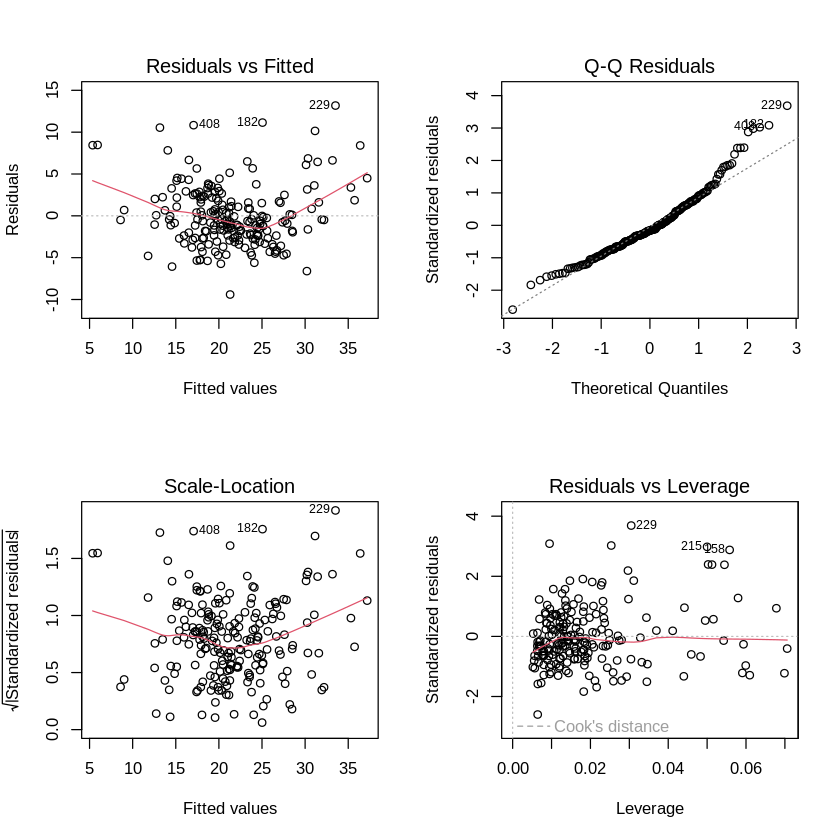

In [ ]:
# Trực quan hóa
par(mfrow = c(2, 2))
plot(pca_model2)

- Biểu đồ Residuals vs Fitted Plot: Như kết quả từ biểu đồ, ta thấy dáng của đường màu đỏ chưa gần như một đường thẳng và có xu hướng lệch về phía bên dưới của biểu đồ. Điều này thể hiện có tồn tại mối quan hệ phi tuyến trong dữ liệu.
- Biểu đồ Q-Q: Các giá trị thặng dư (residual) nên có phân phối chuẩn. Để kiểm tra điều này, chúng ta cần quan sát biểu đồ QQ Residuals plot, nếu các điểm được xếp thành một đường thẳng (hoặc gần như thẳng) thì chứng tỏ các giá trị thặng dư (residual) có phân phối chuẩn. Như hình vẽ kết quả ở trên, ta thấy rõ điều đó, residual chưa có phân phối chuẩn. --> Kiểm định
-  Biểu đồ Scale location: Đường màu đỏ gần như không nằm ngang trên biểu đồ. Nếu đúng như vậy thì giả định về tính đồng nhất chưa được thỏa mãn đối với mô hình hồi quy đã cho. Nghĩa là, độ phân tán của giá trị thặng dư gần chưa bằng nhau ở tất cả các giá trị phù hợp. -> Kiểm đinh.

In [ ]:
# Kiểm định shapiro
# - H0: Biến thặng dư của mô hình phân phối chuẩn trong một số quần thể.
# - H1: Biến thặng dư của mô hình không phân phối chuẩn trong một số quần thể.
shapiro.test(residuals(pca_model2))


	Shapiro-Wilk normality test

data:  residuals(pca_model2)
W = 0.95576, p-value = 5.221e-06


In [ ]:
# Kiểm định Breusch-Pagan
# - H0: phương sai không đổi
# - H1: phương sai thay đổi

bptest(pca_model2)


	studentized Breusch-Pagan test

data:  pca_model2
BP = 7.0744, df = 3, p-value = 0.06956


##### Nhận xét
- Kiểm định shapiro cho kết quả là phân phối chuẩn
- Kiểm định Breusch cho ta kết quả là phương sai thay đổi (pvalue > 0.05)

[1] 9.905953

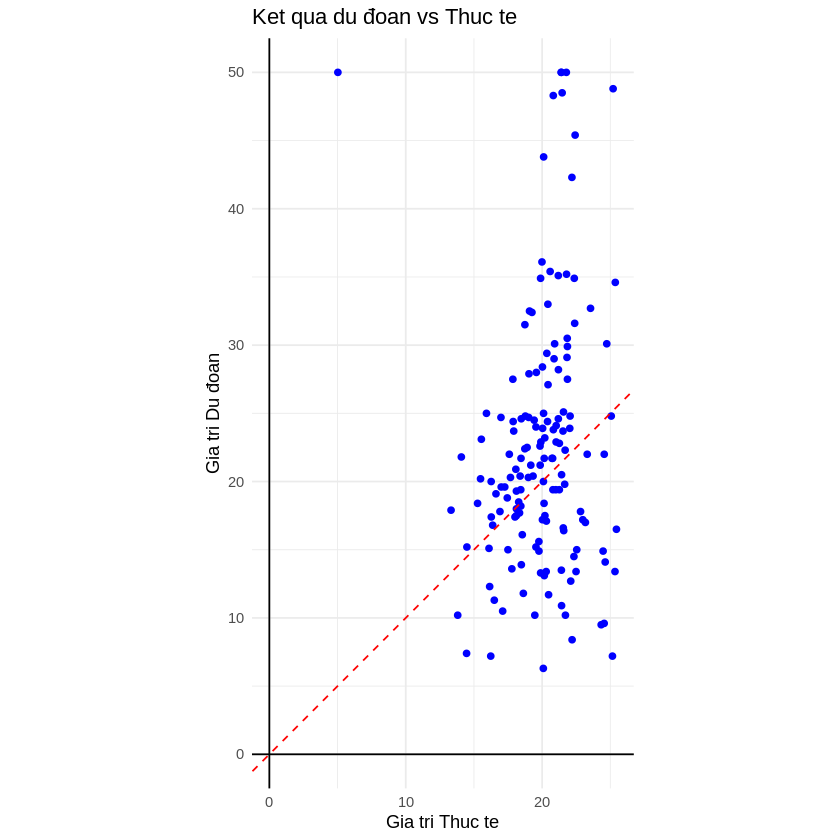

In [ ]:
# Dư đoán
alpha = pca_model2$coefficients
gamma = pca_df$loadings[, 1:3] %*% alpha[-1]
gamma = c(alpha[1] - pca_df$center %*% gamma, gamma)
test_pca = scale(test[, -c(2,11)], center = pca_df$center, scale = pca_df$scale) # Centered and scaled
test_pca = t(apply(test_pca, 1,function(x) t(pca_df$loadings[, 1:3]) %*% x))
test_pca <- data.frame("Comp" = test_pca)
# Kiểm định tập test

# predict
results = predict(pca_model2, test_pca)
vis_df = data.frame(
    du_doan = results,
    label = test$medv
)

library(ggplot2)
ggplot(vis_df , aes(x = du_doan, y = label)) +
  geom_point(color = 'blue') + geom_abline(intercept = 0, slope = 1, color = 'red', linetype = "dashed") +
  geom_hline(yintercept = 0, color = "black") +  # Trục Ox
  geom_vline(xintercept = 0, color = "black") +  # Trục Oy
  labs(
    title = "Ket qua du đoan vs Thuc te",
    x = "Gia tri Thuc te",
    y = "Gia tri Du đoan"
  ) +
  theme_minimal() + coord_fixed(ratio = 1)
rmse(results, test$medv)

### Kết luận
- Qua 3 mô hình của 3 thí nghiệm trên, ta thấy mô hình sử dụng data gốc cho kết quả đánh giá trên tập test là tốt nhất, mô hình PCA với 3 COMP cho kết quả tệ nhất. (dựa vào RMSE).
- Nguyên nhân: Các biến độc lập không có hoặc ít mối quan hệ đa cộng tuyến với nhau. Vì thế, việc áp dụng PCA vào không có nghĩa (gây mất mát thông tin).
- Mô hình tốt nhât được chọn là: **model = 6.577221* rm - 0.067902 * age - 0.996633 * dis - 0.007017 * tax -0.796955 * ptratio -0.159638 * lstat** (p-value=0.05)
- Mô hình cho ta biết:
    + Nhìn chung số lượng phòng sẽ ảnh hưởng lớn đến giá nhà ở. Nếu tăng lên 1 phòng thì giá nhà sẽ tăng lên 6.5 đơn vị.
    + Vị trí so với trung tâm thành phố cũng tác động tới giá nhà, nhà càng xa trung tâm thì càng rẻ.
    + Các thành phần khác có tác động không đáng kể đến giá nhà.